<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.0.1+cu118


'cuda'

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets

from torchvision import transforms

In [4]:
# Get the MNIST train dataset 
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor()) # do we want to transform the data as we download it? 

# Get the MNIST test dataset
test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

0.3%

100.0%


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100.0%

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw




11.9%

100.0%


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100.0%

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [5]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f"Image:\n {img}") 
print(f"Label:\n {label}")

Image:
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
# Check out the shapes of our data
print(f"Image shape: {img.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label} -> no shape, due to being integer")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


In [9]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


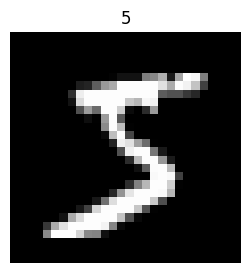

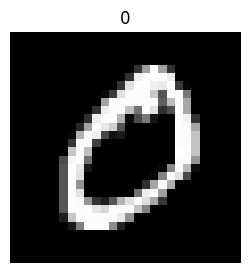

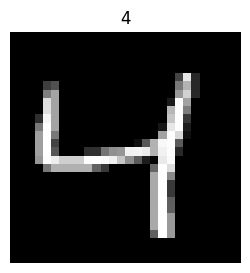

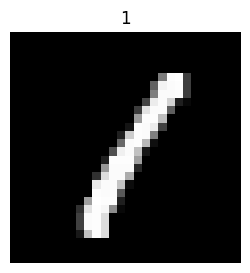

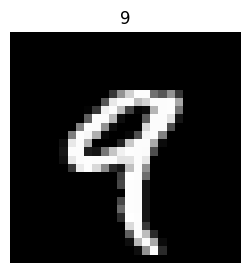

In [10]:
import matplotlib.pyplot as plt
for i in range(5):
    img = train_data[i][0]
    print(img.shape)
    img_squeeze = img.squeeze()
    print(img_squeeze.shape)
    label = train_data[i][1]
    plt.figure(figsize=(3, 3))
    plt.imshow(img_squeeze, cmap="gray")
    plt.title(label)
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
# Create train dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [12]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1233c1028d0>,
 <torch.utils.data.dataloader.DataLoader at 0x123689c3710>)

In [13]:
for sample in next(iter(train_dataloader)):
    print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [15]:
from torch import nn 
class MNIST_model(torch.nn.Module):
    """Model capable of predicting on MNIST dataset.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int): 
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)                   
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv block 1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv block 2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [16]:
device

'cuda'

In [17]:
model = MNIST_model(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
model

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [18]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1, 28, 28)).unsqueeze(dim=0).to(device)
# dummy_x.shape
model(dummy_x)

tensor([[ 0.0180,  0.0193, -0.0068,  0.0197, -0.0433, -0.0497, -0.0389, -0.0501,
         -0.0360,  0.1039]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [19]:
dummy_x_2 = torch.rand(size=([1, 10, 7, 7]))
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [20]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [25]:
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()
        # Put data on CPU
        X, y = X.to("cpu"), y.to("cpu")
        # Forward pass
        y_pred = model_cpu(X)
        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # Optimizer zero grad
        optimizer.zero_grad()
        # Loss backward
        loss.backward()
        # Step the optimizer
        optimizer.step()
    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)
    ### Testing loop
    test_loss_total = 0
    # Put model in eval mode
    model_cpu.eval()
    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on CPU
            X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
            test_pred = model_cpu(X_test)
            test_loss = loss_fn(test_pred, y_test)
            test_loss_total += test_loss
        test_loss_total /= len(test_dataloader)
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

 20%|██        | 1/5 [00:22<01:30, 22.74s/it]

Epoch: 0 | Loss: 0.441 | Test loss: 0.077


 40%|████      | 2/5 [00:44<01:06, 22.01s/it]

Epoch: 1 | Loss: 0.079 | Test loss: 0.059


 60%|██████    | 3/5 [01:05<00:43, 21.51s/it]

Epoch: 2 | Loss: 0.061 | Test loss: 0.056


 80%|████████  | 4/5 [01:26<00:21, 21.44s/it]

Epoch: 3 | Loss: 0.051 | Test loss: 0.035


100%|██████████| 5/5 [01:47<00:00, 21.56s/it]

Epoch: 4 | Loss: 0.045 | Test loss: 0.041
CPU times: total: 10min 42s
Wall time: 1min 47s


In [26]:
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_cpu.train()
        # Put data on CPU
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_pred = model_gpu(X)
        # Loss calculation
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # Optimizer zero grad
        optimizer.zero_grad()
        # Loss backward
        loss.backward()
        # Step the optimizer
        optimizer.step()
    # Adjust train loss for number of batches
    train_loss /= len(train_dataloader)
    ### Testing loop
    test_loss_total = 0
    # Put model in eval mode
    model_gpu.eval()
    # Turn on inference mode
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on CPU
            X_test, y_test = X_test.to(device), y_test.to(device)
            test_pred = model_gpu(X_test)
            test_loss = loss_fn(test_pred, y_test)
            test_loss_total += test_loss
        test_loss_total /= len(test_dataloader)
    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

 20%|██        | 1/5 [00:09<00:39,  9.81s/it]

Epoch: 0 | Loss: 0.255 | Test loss: 0.057


 40%|████      | 2/5 [00:19<00:28,  9.61s/it]

Epoch: 1 | Loss: 0.063 | Test loss: 0.047


 60%|██████    | 3/5 [00:28<00:18,  9.41s/it]

Epoch: 2 | Loss: 0.049 | Test loss: 0.043


 80%|████████  | 4/5 [00:38<00:09,  9.49s/it]

Epoch: 3 | Loss: 0.041 | Test loss: 0.036


100%|██████████| 5/5 [00:47<00:00,  9.45s/it]

Epoch: 4 | Loss: 0.037 | Test loss: 0.032
CPU times: total: 56.8 s
Wall time: 47.2 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

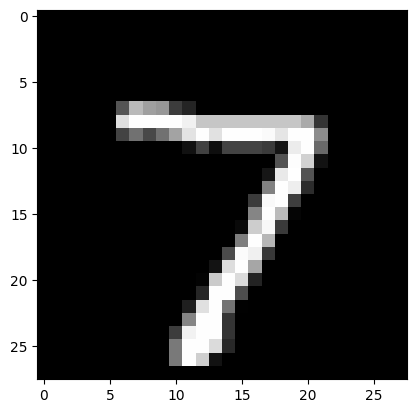

In [27]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [28]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

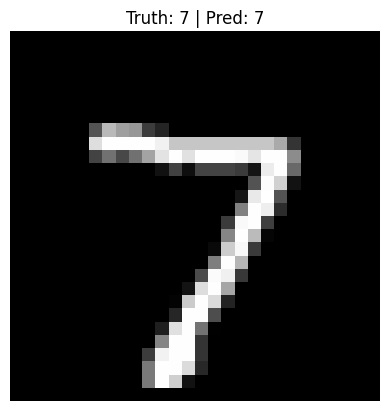

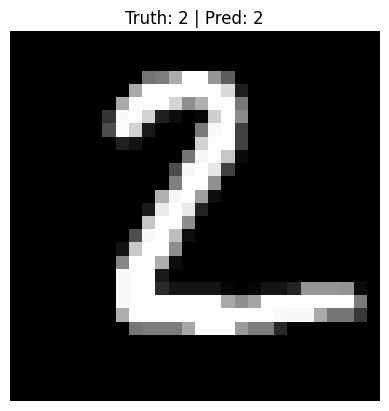

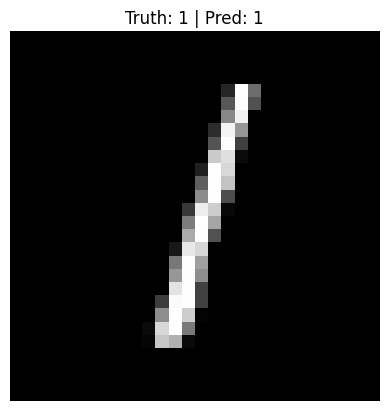

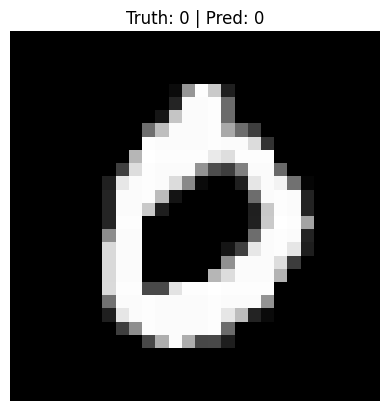

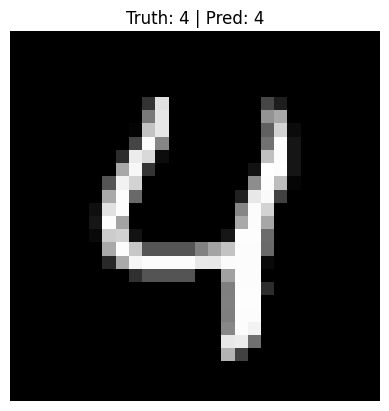

In [29]:
num_to_plot = 5 
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]
    # Make prediction on image
    model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)
    # Plot the image and prediction
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [31]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


In [32]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
    for batch, (X, y) in tqdm(enumerate(test_dataloader)):
        # Make sure data on right device
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_pred_logits = model_gpu(X)
        # Logits -> Pred probs -> Pred label
        y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
        # Append the labels to the preds list
        y_preds.append(y_pred_labels)
    y_preds=torch.cat(y_preds).cpu()
len(y_preds) 

313it [00:01, 291.03it/s]


10000

In [33]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

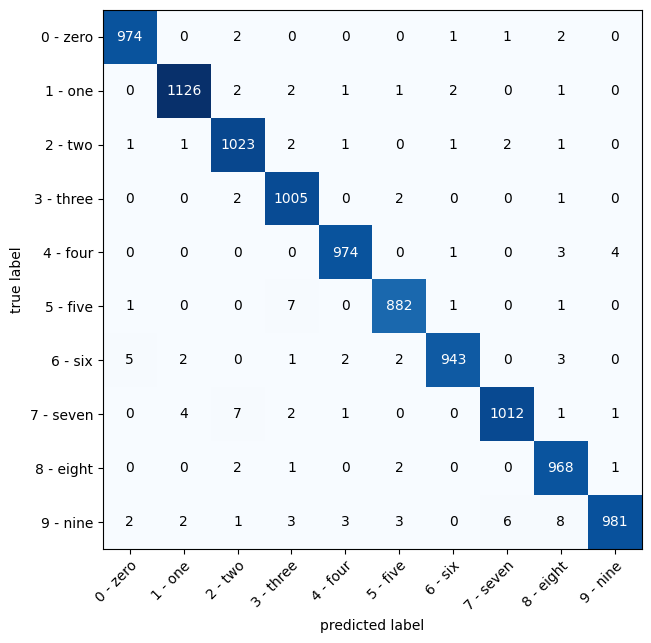

In [35]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds, target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [36]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [37]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [50]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

(60000, 10000)

In [51]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [52]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [53]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [54]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [55]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=len(fashion_mnist_class_names)).to(device)

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
    train_loss, test_loss_total = 0, 0
    train_acc, test_acc = 0, 0
    ### Training
    model_2.train()
    for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
        X_train, y_train = X_train.to(device), y_train.to(device)
        # Forward pass and loss
        y_pred = model_2(X_train)
        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        train_acc += acc_fn(y_pred, y_train)
        # Backprop and gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Adjust the loss/acc (find the loss/acc per epoch)
    train_loss /= len(fashion_mnist_train_dataloader)
    train_acc /= len(fashion_mnist_train_dataloader)
    ### Testing
    model_2.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
            X_test, y_test = X_test.to(device), y_test.to(device)
            # Forward pass and loss
            y_pred_test = model_2(X_test)
            test_loss = loss_fn(y_pred_test, y_test)
            test_loss_total += test_loss
            test_acc += acc_fn(y_pred_test, y_test)
        # Adjust the loss/acc (find the loss/acc per epoch)
        test_loss /= len(fashion_mnist_test_dataloader)
        test_acc /= len(fashion_mnist_test_dataloader)
    # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

 20%|██        | 1/5 [00:12<00:49, 12.35s/it]

Epoch: 0 | Train loss: 1.334 | Train acc: 0.50 | Test loss: 258.217 | Test acc: 0.74


 40%|████      | 2/5 [00:24<00:36, 12.27s/it]

Epoch: 1 | Train loss: 0.559 | Train acc: 0.80 | Test loss: 159.791 | Test acc: 0.82


 60%|██████    | 3/5 [00:36<00:24, 12.21s/it]

Epoch: 2 | Train loss: 0.459 | Train acc: 0.84 | Test loss: 140.691 | Test acc: 0.84


 80%|████████  | 4/5 [00:48<00:12, 12.12s/it]

Epoch: 3 | Train loss: 0.413 | Train acc: 0.85 | Test loss: 133.854 | Test acc: 0.85


100%|██████████| 5/5 [01:00<00:00, 12.17s/it]

Epoch: 4 | Train loss: 0.387 | Train acc: 0.86 | Test loss: 123.003 | Test acc: 0.86


In [56]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
    for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
        y_logits = model_2(X_test.to(device))
        y_pred_probs = torch.softmax(y_logits, dim=1)
        y_pred_labels = torch.argmax(y_pred_probs, dim=1)
        test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)    

100%|██████████| 313/313 [00:01<00:00, 300.84it/s]


(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [57]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1389

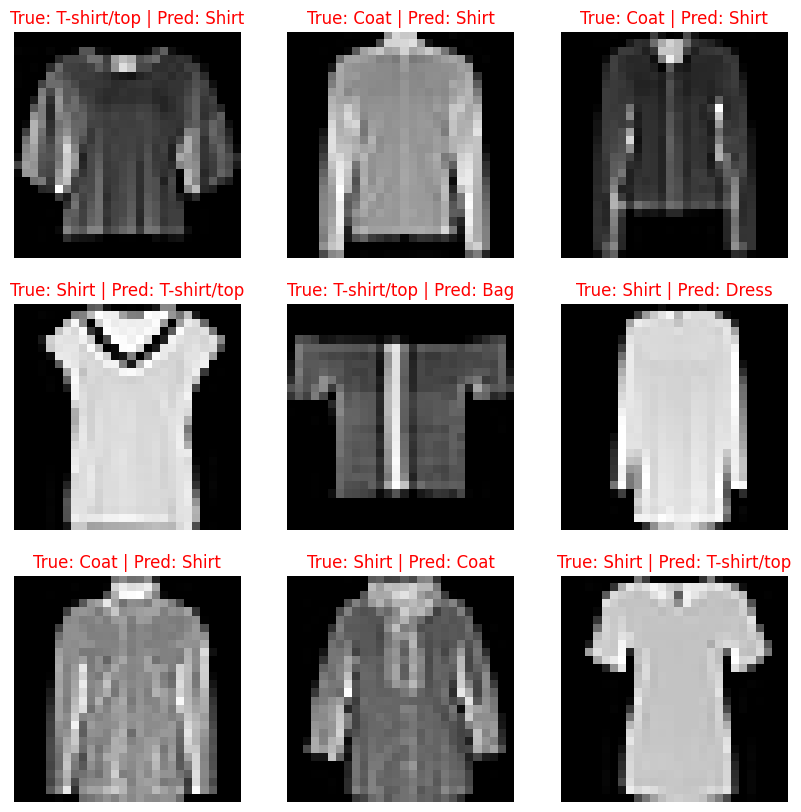

In [58]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
    # Get true and pred labels
    true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
    pred_label = fashion_mnist_class_names[test_preds[idx]]
    # Plot the wrong prediction with its original label
    plt.subplot(3, 3, i+1)
    plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
    plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
    plt.axis(False);